# DATA201 Project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

C:\Users\Nick\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1. 

**Load all three files into Python and take a look at them. Ensure that you understand what is recorded in each.**  

In [2]:
el_nino_df = pd.read_csv(
    'monthly-el-nino-southern-oscillation-index-19862016.csv')
temp_df = pd.read_csv('annual-average-temperature-anomaly-19092013.csv')
rain_df = pd.read_csv('rainfall-19602016.csv')

In [3]:
el_nino_df.head()

,Month_year,Southern_oscillation_index
0,Jan-86,1.0
1,Feb-86,-1.0
2,Mar-86,0.5
3,Apr-86,0.3
4,May-86,-0.2


In [4]:
temp_df.head()

,Year,series,station,data,value
0,1909,national_7_stn_temp_data,Auckland,Temp,NaN
1,1910,national_7_stn_temp_data,Auckland,Temp,14.97
2,1911,national_7_stn_temp_data,Auckland,Temp,14.33
3,1912,national_7_stn_temp_data,Auckland,Temp,13.54
4,1913,national_7_stn_temp_data,Auckland,Temp,13.76


In [5]:
rain_df.head()

,Date,Rainfall_mm,site
0,1/05/1962,0.0,Auckland
1,2/05/1962,0.0,Auckland
2,3/05/1962,38.1,Auckland
3,4/05/1962,3.8,Auckland
4,5/05/1962,0.0,Auckland


**Compare the geographic locations of data collected, and the years.**

In [6]:
temp_df.station.value_counts()

7_Stn_Composite    316
Nelson             211
Hokitika           211
Auckland           211
Masterton          211
Lincoln            211
Dunedin            211
Wellington         211
Name: station, dtype: int64

In [7]:
rain_df.site.value_counts()

Dannevirke      20820
Wellington      20820
Christchurch    20820
MilfordSound    20820
Invercargill    20820
Dunedin         20820
Timaru          20820
Blenheim        20820
Whanganui       20820
Tauranga        20820
LakeTekapo      20820
Gisborne        20820
Taumarunui      20820
NewPlymouth     20820
Whangarei       20820
TaraHills       20820
Hamilton        20820
Napier          20820
Nelson          20820
Waiouru         20820
Reefton         20607
Masterton       20089
Gore            20089
Kerikeri        20089
Rotorua         20089
Taupo           20089
Hokitika        20089
Queenstown      20089
Auckland        20089
Whangaparaoa    20089
Name: site, dtype: int64

In [8]:
el_nino_df[['Month', 'Year']] = el_nino_df.Month_year.str.split('-', expand=True)
el_nino_df = el_nino_df.drop(['Month_year'], axis=1)
el_nino_df['Year']

0      86
1      86
2      86
3      86
4      86
       ..
367    16
368    16
369    16
370    16
371    16
Name: Year, Length: 372, dtype: object

In [9]:
temp_df['Year']

0       1909
1       1910
2       1911
3       1912
4       1913
        ... 
1788    2009
1789    2010
1790    2011
1791    2012
1792    2013
Name: Year, Length: 1793, dtype: object

In [10]:
rain_df = rain_df.dropna() 
rain_df['Date'] = pd.to_datetime(rain_df['Date'])
rain_df['Year'] = rain_df['Date'].dt.year
rain_df = rain_df.drop('Date', axis=1)
rain_df['Year'] = rain_df['Year'].astype(int)
rain_df['Year']

0         1962
1         1962
2         1962
3         1962
4         1962
          ... 
617803    2016
617804    2016
617805    2016
617806    2016
617807    2016
Name: Year, Length: 577657, dtype: int32

**Create new dataframes that contain only the data for matched years and locations where appropriate. Deal appropriately with NaN datapoints.**

In [11]:
el_nino_df['Year'] = el_nino_df['Year'].map(lambda x: '19'+x if int(x) > 16 else '20'+x).astype(int)

In [12]:
temp_df = temp_df.drop(['series', 'data'], axis=1).fillna(temp_df['value'].mean())
temp_df['Year'] = temp_df['Year'].astype(int)
temp_df = temp_df.rename(columns={"station": "Station",
                                  "value": "Average_temperature"})

In [13]:
rain_df = rain_df.rename(columns={"site": "Station"})

In [14]:
merged_df = el_nino_df.merge(rain_df, on='Year')
merged_df = merged_df.merge(temp_df, on=['Station', 'Year'])

In [15]:
merged_df = merged_df[(merged_df.Year.astype(int) > 1985) & 
                      (merged_df.Year.astype(int) < 2014)]
merged_df = merged_df.sort_values(by='Year')
merged_df = merged_df[['Year', 'Station', 'Average_temperature', 
                       'Rainfall_mm', 'Southern_oscillation_index']]
merged_df = merged_df.groupby(['Year', 'Station'], as_index=False).mean()
merged_df

,Year,Station,Average_temperature,Rainfall_mm,Southern_oscillation_index
0,1986,Auckland,7.640,3.124110,-0.083333
1,1986,Dunedin,5.870,2.136427,-0.083333
2,1986,Hokitika,6.100,6.964658,-0.083333
3,1986,Nelson,6.240,2.902192,-0.083333
4,1986,Wellington,6.615,3.590223,-0.083333
...,...,...,...,...,...
157,2013,Dunedin,6.225,2.123288,0.450000
158,2013,Hokitika,6.580,7.278356,0.450000
159,2013,Masterton,6.995,2.483836,0.450000
160,2013,Nelson,7.260,2.841370,0.450000


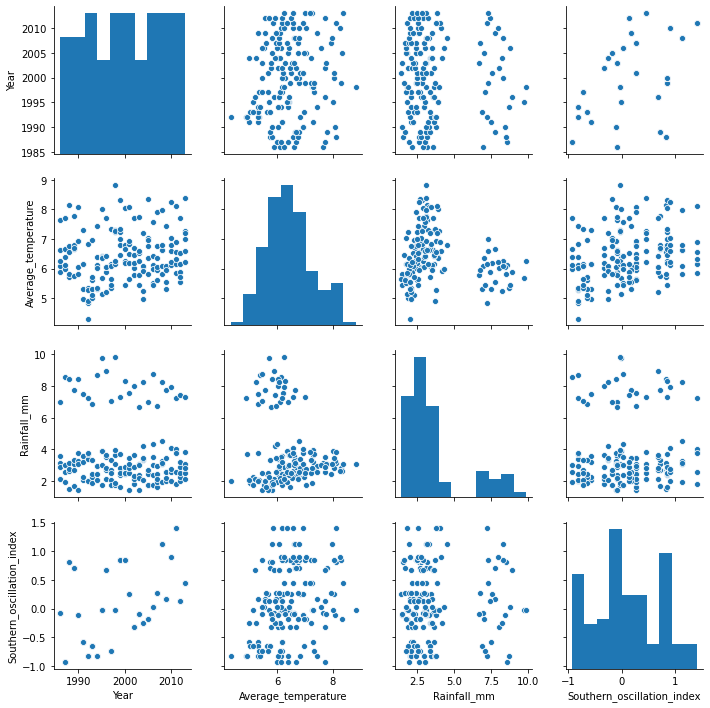

In [16]:
sns.pairplot(merged_df)

### 2.  

**Make plots of the various timeseries and check if you can see the expected temporal pattern in the ENSO index.**

In [17]:
new_df = merged_df.groupby(['Year'], as_index=False).mean()

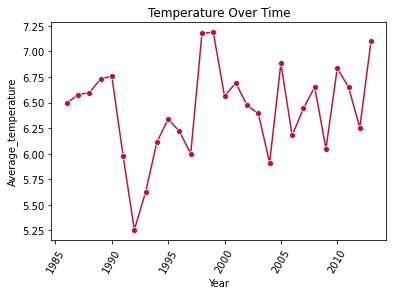

In [18]:
fig, ax = plt.subplots()
sns.lineplot(x="Year", y="Average_temperature", data=new_df, marker="o", color="#b71540").set_title("Temperature Over Time")
plt.xticks(rotation=60)
plt.show()

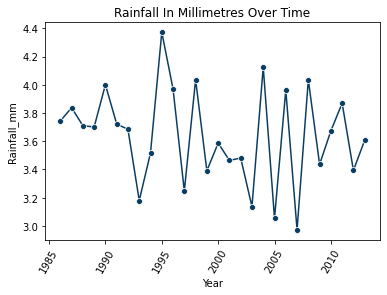

In [19]:
fig, ax = plt.subplots()
sns.lineplot(x="Year", y="Rainfall_mm", data=new_df, marker="o", color="#0a3d62").set_title("Rainfall In Millimetres Over Time")
plt.xticks(rotation=60)
plt.show()

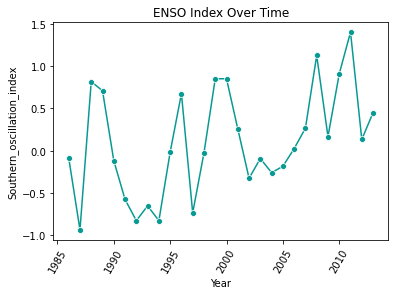

In [20]:
fig, ax = plt.subplots()
sns.lineplot(x="Year", y="Southern_oscillation_index", data=new_df, marker="o", color="#079992").set_title("ENSO Index Over Time")
plt.xticks(rotation=60)
plt.show()

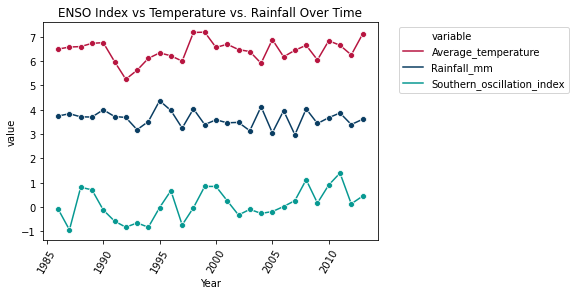

In [21]:
fig, ax = plt.subplots()
melt_pd = pd.melt(new_df, ['Year'])
sns.lineplot(x="Year", y="value", hue="variable", markers=True, dashes=False, data=melt_pd, marker="o", palette=sns.color_palette(["#b71540", "#0a3d62", "#079992"])).set_title("ENSO Index vs Temperature vs. Rainfall Over Time")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(rotation=60)
plt.show()

### 3.  

**Test whether or not there is a correlation between the rainfall and temperature and the index.**

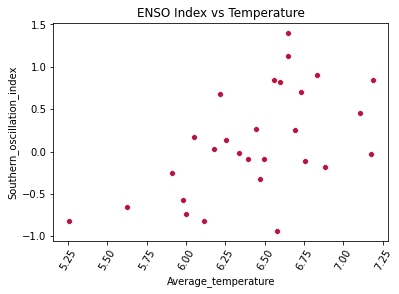

In [22]:
fig, ax = plt.subplots()
sns.scatterplot(x="Average_temperature", y="Southern_oscillation_index", data=new_df, color="#b71540").set_title("ENSO Index vs Temperature")
plt.xticks(rotation=60)
plt.show() 

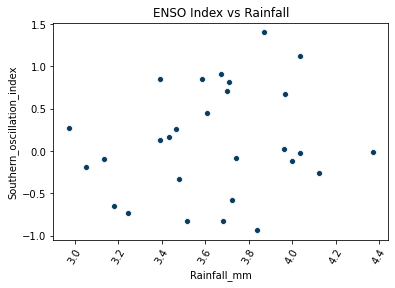

In [23]:
fig, ax = plt.subplots()
sns.scatterplot(x="Rainfall_mm", y="Southern_oscillation_index", data=new_df, color="#0a3d62").set_title("ENSO Index vs Rainfall")
plt.xticks(rotation=60)
plt.show() 

In [24]:
print("Correlation between ENSO & Temperature: {}".format(new_df.corr().Southern_oscillation_index.Average_temperature))
print("Correlation between ENSO & Rainfall: {}".format(new_df.corr().Southern_oscillation_index.Rainfall_mm))
print("Correlation between Temperature & Rainfall: {}".format(new_df.corr().Average_temperature.Rainfall_mm))

Correlation between ENSO & Temperature: 0.559510195127219
Correlation between ENSO & Rainfall: 0.1679467174965941
Correlation between Temperature & Rainfall: 0.058492977680221915


Correlation between ENSO and Temperature is moderately positive, however ENSO and Rainfall has a weak also positive correlation and the correlation between Rainfall and Temperature is even weaker.

### 4.  

**Test whether or not this correlation is stronger or weaker in different parts of the country.**

**Auckland**

In [25]:
auck = merged_df[merged_df['Station']=='Auckland'].groupby(['Year'], as_index=False).mean().corr()

print("Auckland correlation between ENSO & Temperature: {}".format(auck.Southern_oscillation_index.Average_temperature))
print("Auckland correlation between ENSO & Rainfall: {}".format(auck.Southern_oscillation_index.Rainfall_mm))
print("Auckland correlation between Temperature & Rainfall: {}".format(auck.Average_temperature.Rainfall_mm))

Auckland correlation between ENSO & Temperature: 0.5875090867891971
Auckland correlation between ENSO & Rainfall: 0.23853318955369465
Auckland correlation between Temperature & Rainfall: 0.10702479501753076


**Wellington**

In [26]:
welly = merged_df[merged_df['Station']=='Wellington'].groupby(['Year'], as_index=False).mean().corr()

print("Wellington correlation between ENSO & Temperature: {}".format(welly.Southern_oscillation_index.Average_temperature))
print("Wellington correlation between ENSO & Rainfall: {}".format(welly.Southern_oscillation_index.Rainfall_mm))
print("Wellington correlation between Temperature & Rainfall: {}".format(welly.Average_temperature.Rainfall_mm))

Wellington correlation between ENSO & Temperature: 0.4480734517570974
Wellington correlation between ENSO & Rainfall: 0.1988206250570078
Wellington correlation between Temperature & Rainfall: -0.06740163692963544


**Dunedin**

In [27]:
dunners = merged_df[merged_df['Station']=='Dunedin'].groupby(['Year'], as_index=False).mean().corr()

print("Dunedin correlation between ENSO & Temperature: {}".format(dunners.Southern_oscillation_index.Average_temperature))
print("Dunedin correlation between ENSO & Rainfall: {}".format(dunners.Southern_oscillation_index.Rainfall_mm))
print("Dunedin correlation between Temperature & Rainfall: {}".format(dunners.Average_temperature.Rainfall_mm))

Dunedin correlation between ENSO & Temperature: 0.481384596634903
Dunedin correlation between ENSO & Rainfall: -0.10896492187114054
Dunedin correlation between Temperature & Rainfall: -0.26956456425118536


**Hokitika**

In [28]:
hok = merged_df[merged_df['Station']=='Hokitika'].groupby(['Year'], as_index=False).mean().corr()

print("Hokitika correlation between ENSO & Temperature: {}".format(hok.Southern_oscillation_index.Average_temperature))
print("Hokitika correlation between ENSO & Rainfall: {}".format(hok.Southern_oscillation_index.Rainfall_mm))
print("Hokitika correlation between Temperature & Rainfall: {}".format(hok.Average_temperature.Rainfall_mm))

Hokitika correlation between ENSO & Temperature: 0.6064749599499358
Hokitika correlation between ENSO & Rainfall: 0.043338221860496615
Hokitika correlation between Temperature & Rainfall: -0.036933587118561866


**Nelson**

In [29]:
nels = merged_df[merged_df['Station']=='Nelson'].groupby(['Year'], as_index=False).mean().corr()

print("Nelson correlation between ENSO & Temperature: {}".format(nels.Southern_oscillation_index.Average_temperature))
print("Nelson correlation between ENSO & Rainfall: {}".format(nels.Southern_oscillation_index.Rainfall_mm))
print("Nelson correlation between Temperature & Rainfall: {}".format(nels.Average_temperature.Rainfall_mm))

Nelson correlation between ENSO & Temperature: 0.57026294956614
Nelson correlation between ENSO & Rainfall: 0.3627529634669099
Nelson correlation between Temperature & Rainfall: 0.2695685462201645


**Masterton**

In [30]:
mast = merged_df[merged_df['Station']=='Masterton'].groupby(['Year'], as_index=False).mean().corr()

print("Masterton correlation between ENSO & Temperature: {}".format(mast.Southern_oscillation_index.Average_temperature))
print("Masterton correlation between ENSO & Rainfall: {}".format(mast.Southern_oscillation_index.Rainfall_mm))
print("Masterton correlation between Temperature & Rainfall: {}".format(mast.Average_temperature.Rainfall_mm))

Masterton correlation between ENSO & Temperature: 0.5360296146000918
Masterton correlation between ENSO & Rainfall: 0.012065274299584478
Masterton correlation between Temperature & Rainfall: -0.31133765771662664


**Does correlation vary between parts of the country?**

Yes.

### 5.  

**Using the Auckland data,  predict the strength of the ENSO index for each year using therainfall and temperature data.  You will need to:**

**•Choose the appropriate data and normalise it**

In [31]:
auck_df = merged_df[merged_df['Station']=='Auckland']
X = auck_df.drop(['Year', 'Station', 'Southern_oscillation_index'], axis=1)
y = auck_df['Southern_oscillation_index'].copy()

In [32]:
X = preprocessing.StandardScaler().fit_transform(X)

**•Split it into training and testing sets**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**•Choose an appropriate algorithm**

In [34]:
lr = LinearRegression()

**•Perform the training**

In [35]:
model = lr.fit(X_train, y_train)

**•Report appropriate metrics**

In [36]:
lr_train_pred = model.predict(X_train)
lr_test_pred = model.predict(X_test)
print(" Linear Regression Training Set RMSE: %.4g" % np.sqrt(metrics.mean_squared_error(lr_train_pred, y_train)))
print("Linear Regression Test Set RMSE: %.4g" % np.sqrt(metrics.mean_squared_error(lr_test_pred, y_test)))

 Linear Regression Training Set RMSE: 0.4434
Linear Regression Test Set RMSE: 0.6775


### 6.  

**Using just the ENSO index data, see if you can predict the strength of the ENSO index for date t+1 using the index values for dates t−1, t−2, t−3. The easiest way to do this is to assemble the data into an array with 3 columns. The first few rows would be (where I_m−y_t is the index value for date month year) Then use the first line to predict I_04−86 and so on. You need to follow the same data preparation steps as in the previous question**


**Compare the model with two others:**


**(a)  Using the last 6 monthly values instead of the last 3**


**(b)  Using the last 12 monthly values instead of the last 3**

In [37]:
ENSO_three = pd.DataFrame({
                    "t3": el_nino_df.Southern_oscillation_index,
                    "t2": el_nino_df.Southern_oscillation_index,
                    "t1": el_nino_df.Southern_oscillation_index,
                    "t0": el_nino_df.Southern_oscillation_index})

ENSO_three.t3 = ENSO_three.t3.shift(3)
ENSO_three.t2 = ENSO_three.t2.shift(2)
ENSO_three.t1 = ENSO_three.t1.shift(1)
ENSO_three = ENSO_three.dropna()

In [38]:
ENSO_six = pd.DataFrame({
                    "t6": el_nino_df.Southern_oscillation_index,
                    "t5": el_nino_df.Southern_oscillation_index,
                    "t4": el_nino_df.Southern_oscillation_index,
                    "t3": el_nino_df.Southern_oscillation_index,
                    "t2": el_nino_df.Southern_oscillation_index,
                    "t1": el_nino_df.Southern_oscillation_index,
                    "t0": el_nino_df.Southern_oscillation_index})

ENSO_six.t6 = ENSO_six.t6.shift(6)
ENSO_six.t5 = ENSO_six.t5.shift(5)
ENSO_six.t4 = ENSO_six.t4.shift(4)
ENSO_six.t3 = ENSO_six.t3.shift(3)
ENSO_six.t2 = ENSO_six.t2.shift(2)
ENSO_six.t1 = ENSO_six.t1.shift(1)
ENSO_six = ENSO_six.dropna()

In [39]:
ENSO_twelve = pd.DataFrame({
                    "t12": el_nino_df.Southern_oscillation_index,
                    "t11": el_nino_df.Southern_oscillation_index,
                    "t10": el_nino_df.Southern_oscillation_index,
                    "t9": el_nino_df.Southern_oscillation_index,
                    "t8": el_nino_df.Southern_oscillation_index,
                    "t7": el_nino_df.Southern_oscillation_index,
                    "t6": el_nino_df.Southern_oscillation_index,
                    "t5": el_nino_df.Southern_oscillation_index,
                    "t4": el_nino_df.Southern_oscillation_index,
                    "t3": el_nino_df.Southern_oscillation_index,
                    "t2": el_nino_df.Southern_oscillation_index,
                    "t1": el_nino_df.Southern_oscillation_index,
                    "t0": el_nino_df.Southern_oscillation_index})
ENSO_twelve.t12 = ENSO_twelve.t6.shift(12)
ENSO_twelve.t11 = ENSO_twelve.t5.shift(11)
ENSO_twelve.t10 = ENSO_twelve.t4.shift(10)
ENSO_twelve.t9 = ENSO_twelve.t3.shift(9)
ENSO_twelve.t8 = ENSO_twelve.t2.shift(8)
ENSO_twelve.t7 = ENSO_twelve.t1.shift(7)
ENSO_twelve.t6 = ENSO_twelve.t6.shift(6)
ENSO_twelve.t5 = ENSO_twelve.t5.shift(5)
ENSO_twelve.t4 = ENSO_twelve.t4.shift(4)
ENSO_twelve.t3 = ENSO_twelve.t3.shift(3)
ENSO_twelve.t2 = ENSO_twelve.t2.shift(2)
ENSO_twelve.t1 = ENSO_twelve.t1.shift(1)
ENSO_twelve = ENSO_twelve.dropna()

In [40]:
ENSO_three_X = ENSO_three.drop('t0', axis=1)
ENSO_three_y = ENSO_three['t0'].copy()

ENSO_three_X = preprocessing.StandardScaler().fit_transform(ENSO_three_X)

ENSO_three_X_train, ENSO_three_X_test, ENSO_three_y_train, ENSO_three_y_test = train_test_split(ENSO_three_X, ENSO_three_y, test_size=0.2, random_state=42)

lr = LinearRegression()

ENSO_three_model = lr.fit(ENSO_three_X_train, ENSO_three_y_train)

ENSO_three_train_pred = ENSO_three_model.predict(ENSO_three_X_train)
ENSO_three_test_pred = ENSO_three_model.predict(ENSO_three_X_test)

print("ENSO_three Training Set RMSE: %.4g" % np.sqrt(metrics.mean_squared_error(ENSO_three_train_pred, ENSO_three_y_train)))
print("ENSO_three Test Set RMSE: %.4g" % np.sqrt(metrics.mean_squared_error(ENSO_three_test_pred, ENSO_three_y_test)))

ENSO_three Training Set RMSE: 0.691
ENSO_three Test Set RMSE: 0.6999


In [41]:
ENSO_six_X = ENSO_six.drop('t0', axis=1)
ENSO_six_y = ENSO_six['t0'].copy()

ENSO_six_X = preprocessing.StandardScaler().fit_transform(ENSO_six_X)

ENSO_six_X_train, ENSO_six_X_test, ENSO_six_y_train, ENSO_six_y_test = train_test_split(ENSO_six_X, ENSO_six_y, test_size=0.2, random_state=42)

lr = LinearRegression()

ENSO_six_model = lr.fit(ENSO_six_X_train, ENSO_six_y_train)

ENSO_six_train_pred = ENSO_six_model.predict(ENSO_six_X_train)
ENSO_six_test_pred = ENSO_six_model.predict(ENSO_six_X_test)

print("ENSO_six Training Set RMSE: %.4g" % np.sqrt(metrics.mean_squared_error(ENSO_six_train_pred, ENSO_six_y_train)))
print("ENSO_six Test Set RMSE: %.4g" % np.sqrt(metrics.mean_squared_error(ENSO_six_test_pred, ENSO_six_y_test)))

ENSO_six Training Set RMSE: 0.6861
ENSO_six Test Set RMSE: 0.7033


In [42]:
ENSO_twelve_X = ENSO_twelve.drop('t0', axis=1)
ENSO_twelve_y = ENSO_twelve['t0'].copy()

ENSO_twelve_X = preprocessing.StandardScaler().fit_transform(ENSO_twelve_X)

ENSO_twelve_X_train, ENSO_twelve_X_test, ENSO_twelve_y_train, ENSO_twelve_y_test = train_test_split(ENSO_twelve_X, ENSO_twelve_y, test_size=0.2, random_state=42)

lr = LinearRegression()

ENSO_twelve_model = lr.fit(ENSO_twelve_X_train, ENSO_twelve_y_train)

ENSO_twelve_train_pred = ENSO_twelve_model.predict(ENSO_twelve_X_train)
ENSO_twelve_test_pred = ENSO_twelve_model.predict(ENSO_twelve_X_test)

print("ENSO_twelve Training Set RMSE: %.4g" % np.sqrt(metrics.mean_squared_error(ENSO_twelve_train_pred, ENSO_twelve_y_train)))
print("ENSO_twelve Test Set RMSE: %.4g" % np.sqrt(metrics.mean_squared_error(ENSO_twelve_test_pred, ENSO_twelve_y_test)))

ENSO_twelve Training Set RMSE: 0.6957
ENSO_twelve Test Set RMSE: 0.5944


The 12 months have less RSME which means this model is a better fit then the 6 months or the 3 months. The 3 and the 6 months have similar test RMSE. All Datasets have similar training RMSE. The differences in RMSE is due to the fact the the 12 month dataset has more explanatory variables than the other datasets, more information to make predictions with. On the surface the differences seem small 3 to 6 is a 100% increase, so is 6 to 12 but 3 to 12 is a 300% increase.  

### 7.  

**Test whether or not the ENSO is getting stronger or weaker over time.**

In [43]:
print("Correlation between ENSO & Year: {}".format(el_nino_df.groupby('Year', as_index=False).mean().corr().Southern_oscillation_index.Year))

Correlation between ENSO & Year: 0.233981744325025


**A positive correlation means the index is increasing over time (though the correlation is weak). We also saw the increase in a previous line plot.**

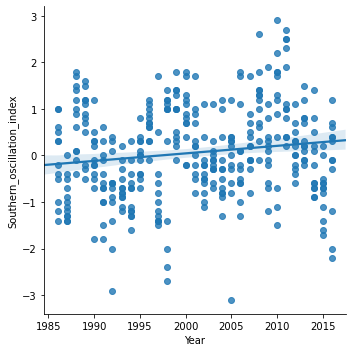

In [44]:
sns.lmplot(x="Year", y="Southern_oscillation_index", data=el_nino_df)